In [ ]:
# use runtime type python to run this cell and R to run the others
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")
if (!require("clevr")) install.packages("clevr")
library ("clevr")

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: clevr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘clevr’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’




In [ ]:
path = "/content/drive/MyDrive/ECE232E/PS4/finance_data/data/"
csv_path = "/content/drive/MyDrive/ECE232E/PS4/finance_data/Name_sector.csv"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table(csv_path,header=TRUE, sep=",",stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste(path,file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
#         print(sector)
#        sectors = c(sectors, as.factor(sector))
        sectors.names = c(sectors.names, toString(sector))
    }
}
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

In [ ]:
cal_cor <- function(price_matrix) {
  t <- ncol(price_matrix)
  q <- (price_matrix[, 2:t] - price_matrix[, 1:t-1]) / price_matrix[, 1:t-1]
  r <- log(1 + q)
  n <- nrow(price_matrix)
  corr_matrix <- matrix(0, n, n)

  # calculate correlations between each pair of stocks
  for (i in 1:(n-1)) {
    for (j in (i+1):n) {
      corr_matrix[i,j] <- cor(r[i,], r[j,])
      corr_matrix[j,i] <- corr_matrix[i,j]
    }
  }
  return(corr_matrix)
}

daily

In [ ]:
temp <- cal_cor(m)
d <- sqrt(2 * (1 - temp))
g<-graph_from_adjacency_matrix(d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)
# fname <- matrix(d)
# save(fname, file = "distance.RData")

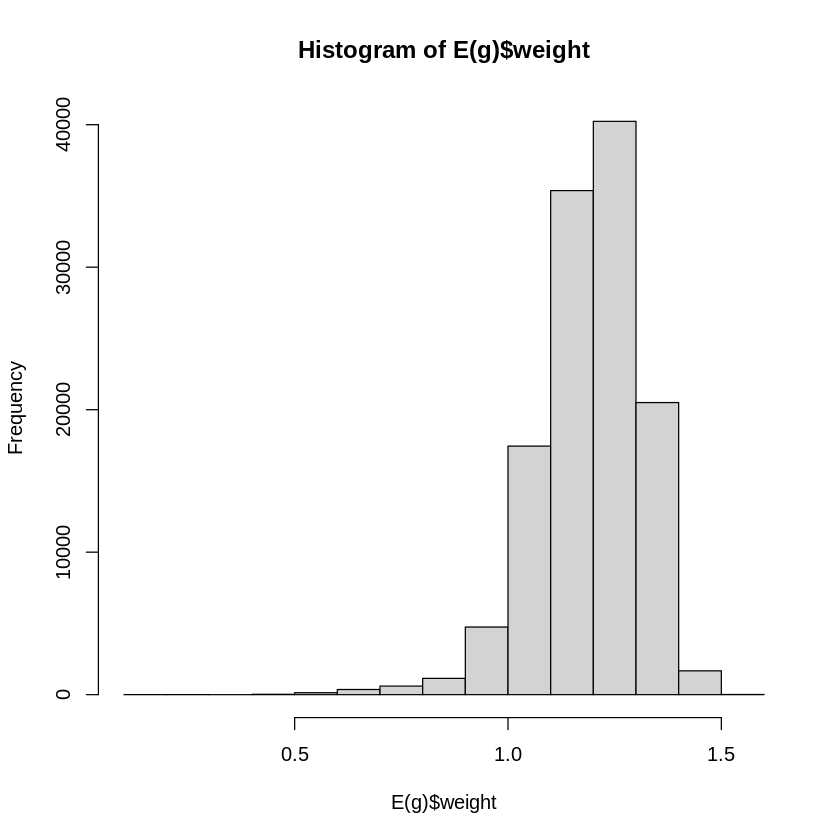

In [ ]:
hist(E(g)$weight)


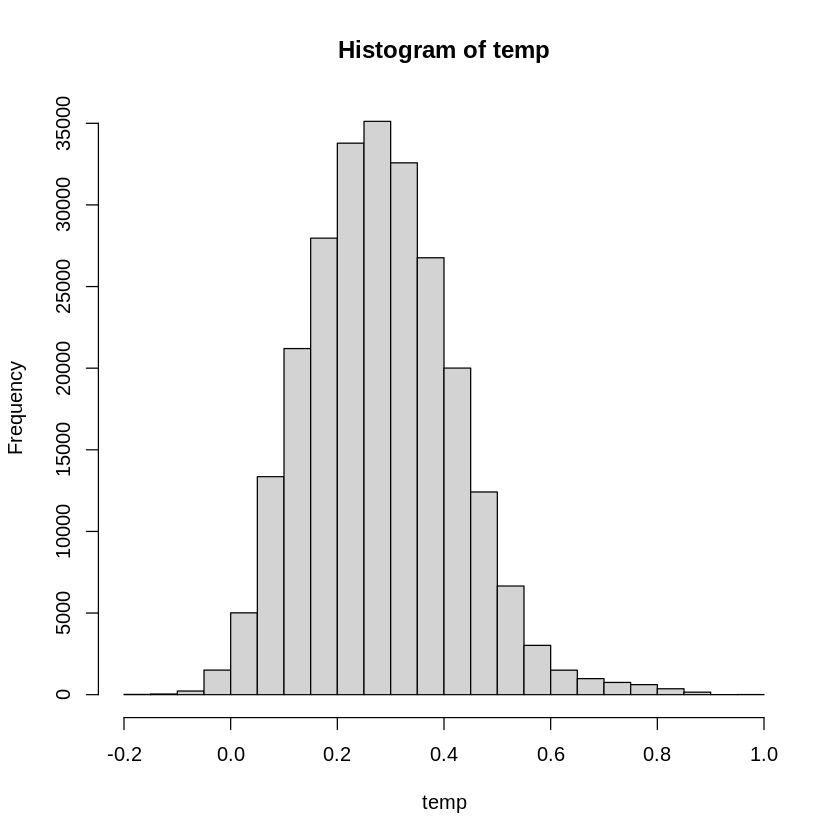

In [ ]:
hist(temp)

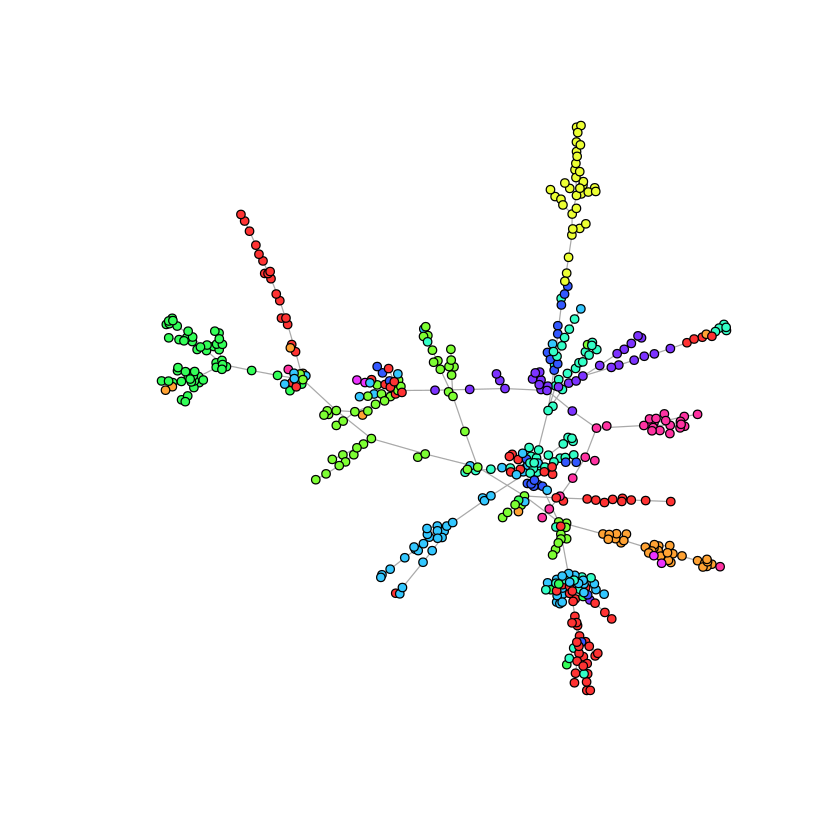

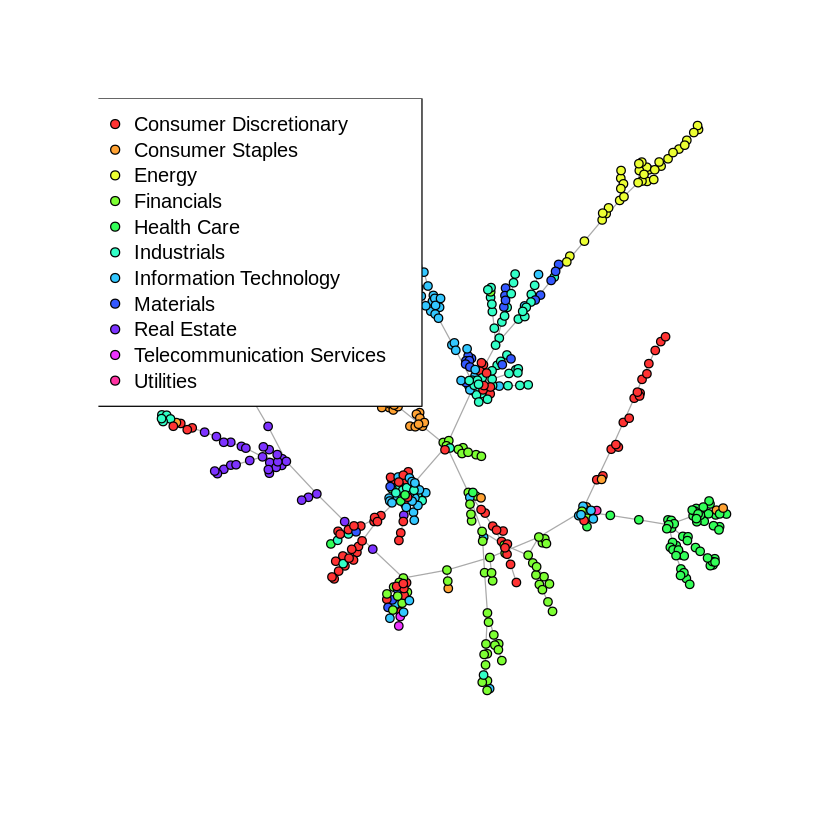

In [ ]:
mst_g <- mst(g,algorithm="prim")
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])

plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 33

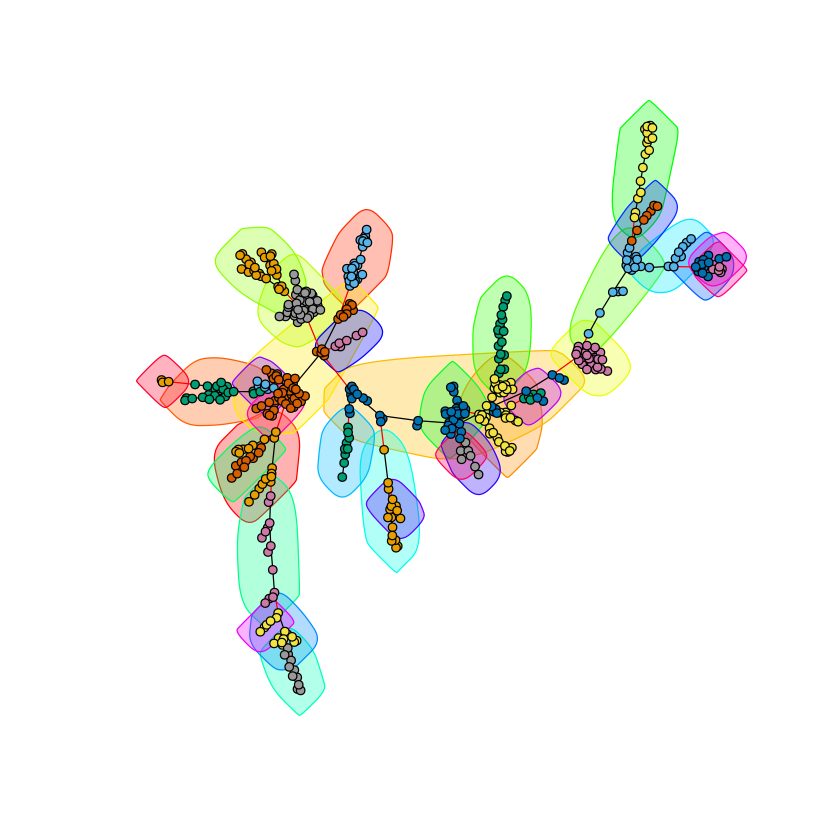

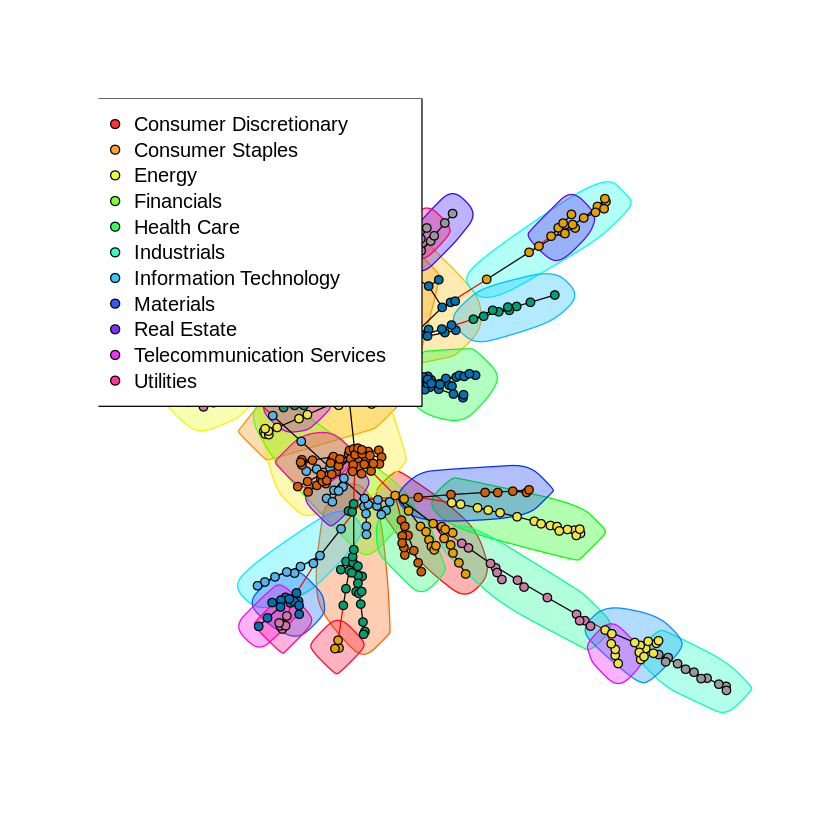

In [ ]:
#cluster
wc_daily <- walktrap.community(mst_g)
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)

plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [ ]:
#get metrics
true<- c(sectors.index)
pred <- c(wc_daily$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.6826446

[1] 0.4792845

weekly

sector_w.set
    Consumer Discretionary           Consumer Staples 
                        84                         35 
                    Energy                 Financials 
                        34                         62 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

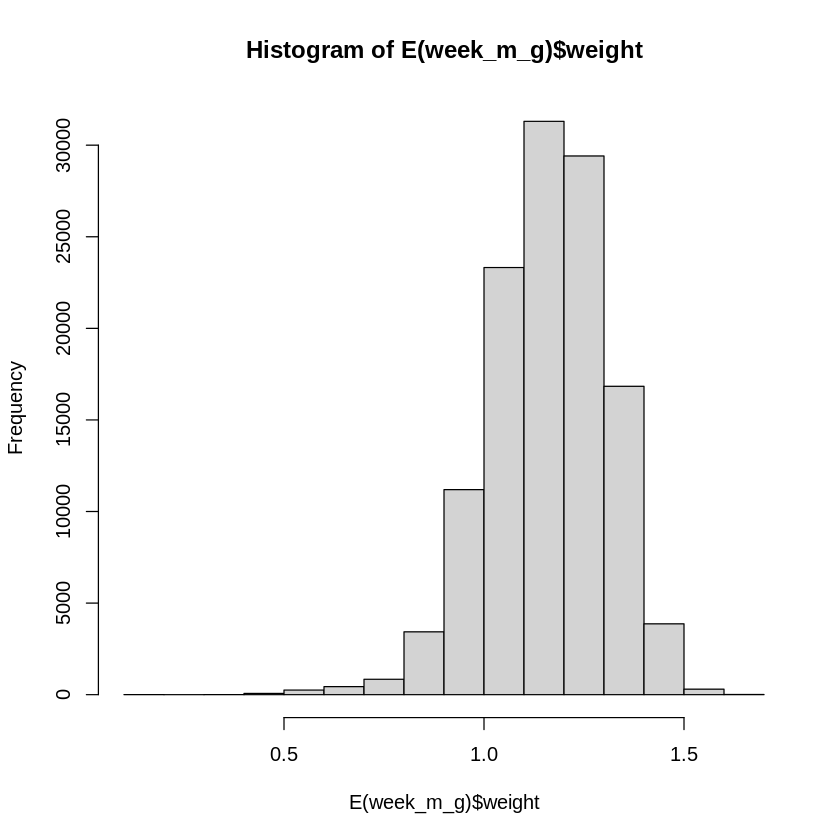

In [ ]:
path = "/content/drive/MyDrive/ECE232E/PS4/finance_data/data/"
csv_path = "/content/drive/MyDrive/ECE232E/PS4/finance_data/Name_sector.csv"

out.file<-""
file.names <- dir(path, pattern =".csv")
weekly_m <- matrix(, nrow = 0, ncol = 143)

sectors_w.table <- read.table(csv_path,header=TRUE, sep=",",stringsAsFactors=TRUE)
sectors_w = c()
sectors_w.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste(path,file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    Date_data<- file$Date
    weekdays_data <-weekdays(as.Date(Date_data)) #this gives weekday name 
    weekly_m_m <- file[weekdays_data == "Monday", 'Close']
    if (length(weekly_m_m)==143){
        weekly_m <- rbind(weekly_m, matrix(weekly_m_m, nrow=1, ncol=143))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector_w <- sectors_w.table$Sector[which(sectors_w.table$Symbol == mystr)]
        sectors_w.names = c(sectors_w.names, toString(sector_w))
    }
}
data_num = ncol(m)
com_num = length(sectors_w.names)
data_num = ncol(m)
sector_w.set<-as.factor(sectors_w.names)
sectors_w.index<-as.numeric(sector_w.set)
num_sector <- length(unique(sectors_w.index))
table(sector_w.set)



week_m_cor <- cal_cor(weekly_m)
week_m_d <- sqrt(2 * (1 - week_m_cor))


week_m_g<-graph_from_adjacency_matrix(week_m_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

hist(E(week_m_g)$weight)


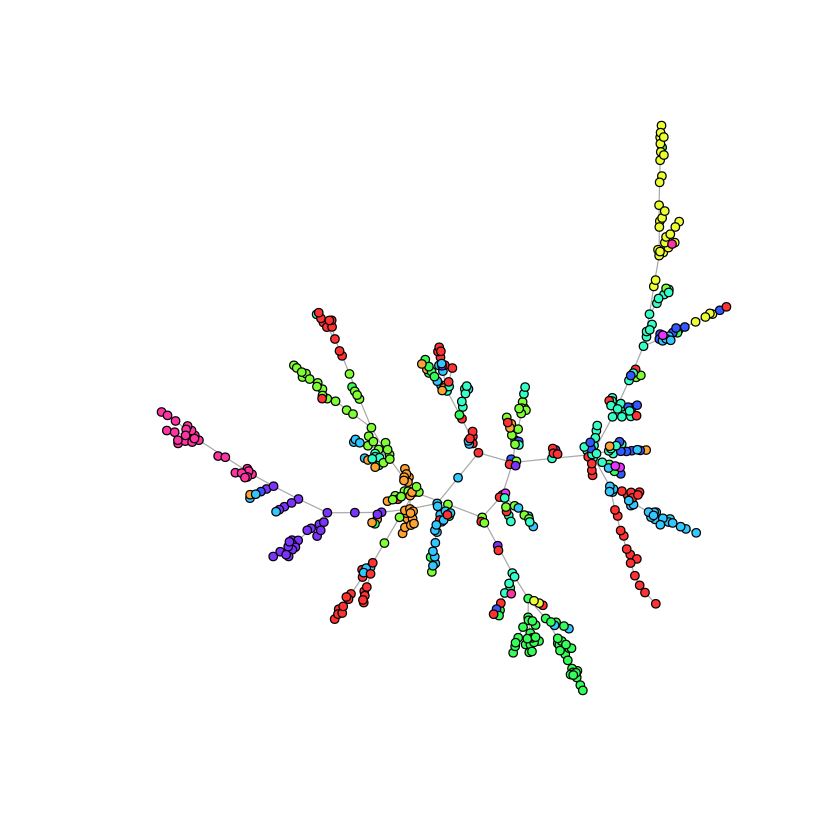

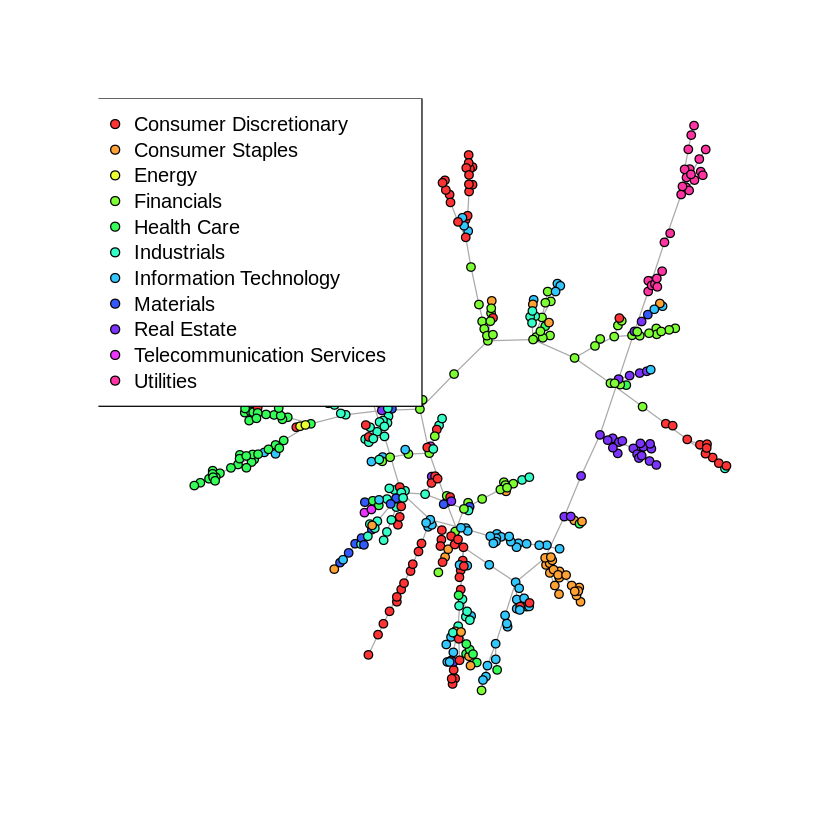

In [ ]:
# mst_week_m <- mst(g,algorithm="prim")
# colbar <- rainbow(num_sector,s = 0.8, v = 1)
# plot(mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
# legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

mst_week_m <- mst(week_m_g,algorithm="prim")
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors_w.index])

plot(mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors_w.index])
legend('topleft',legend=levels(sector_w.set),pch=21, pt.bg=colbar)

[1] 42

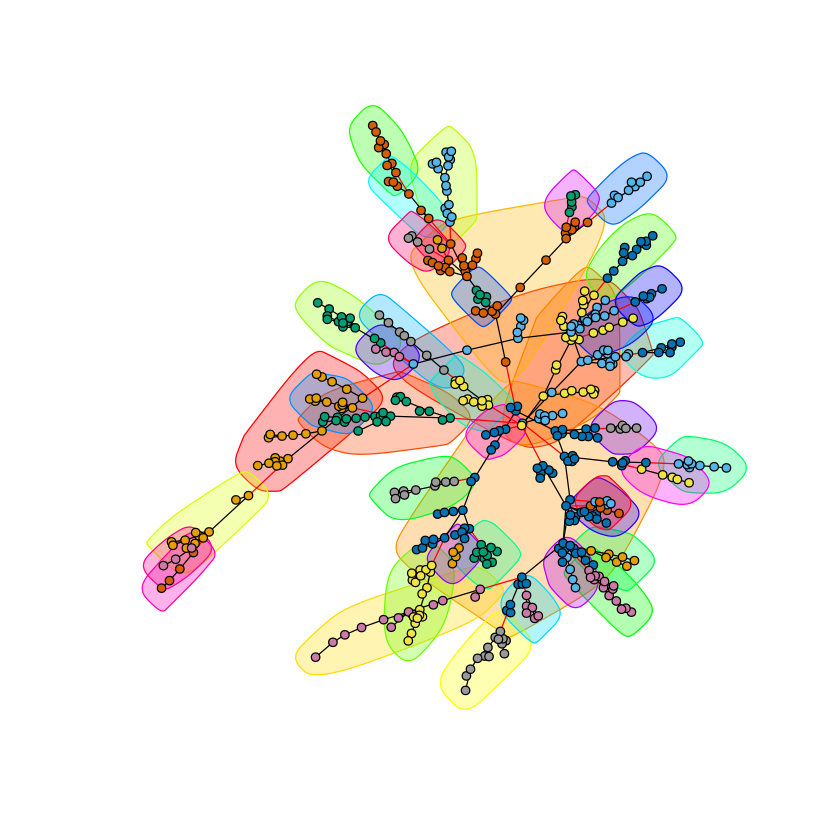

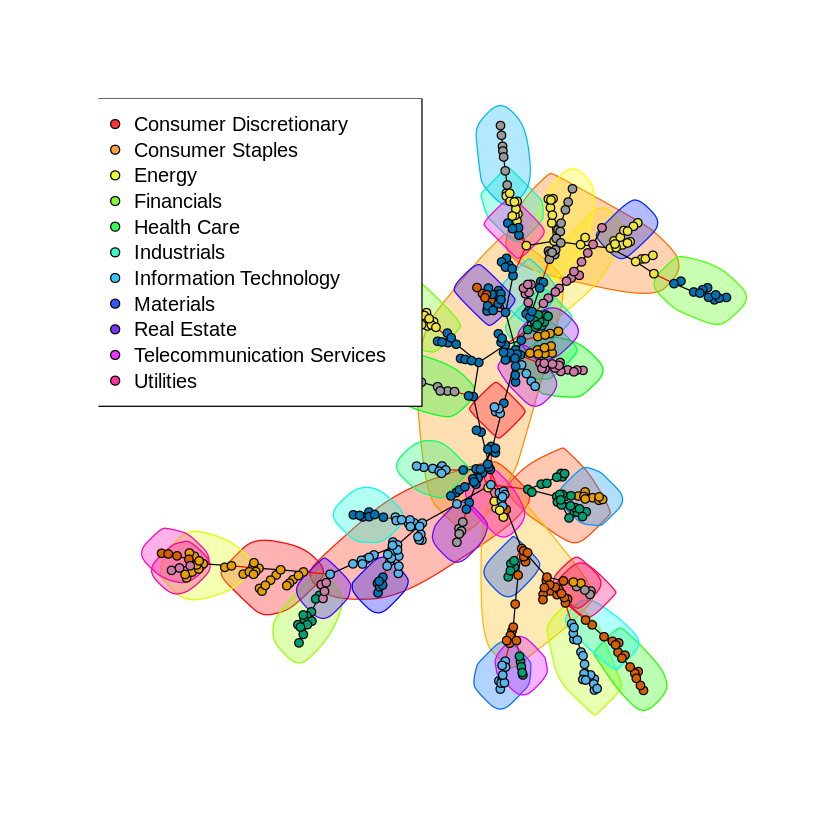

In [ ]:
#cluster
wc_weekly <- walktrap.community(mst_week_m)
length(wc_weekly)
plot(wc_weekly, mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)

plot(wc_weekly, mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [ ]:
#get metrics
true<- c(sectors_w.index)
pred <- c(wc_weekly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.5811237

[1] 0.3900435

Monthly

sector_m.set
    Consumer Discretionary           Consumer Staples 
                        84                         35 
                    Energy                 Financials 
                        34                         62 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

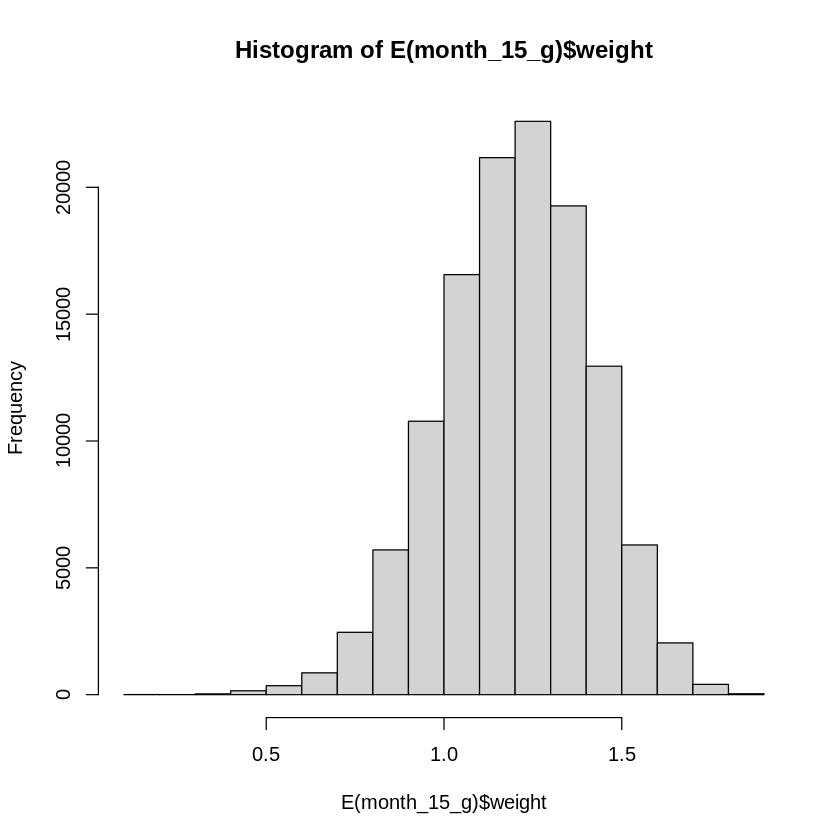

In [ ]:
path = "/content/drive/MyDrive/ECE232E/PS4/finance_data/data/"
csv_path = "/content/drive/MyDrive/ECE232E/PS4/finance_data/Name_sector.csv"

out.file<-""
file.names <- dir(path, pattern =".csv")
monthly_m <- matrix(, nrow = 0, ncol = 25)

sectors_m.table <- read.table(csv_path,header=TRUE, sep=",",stringsAsFactors=TRUE)
sectors_m = c()
sectors_m.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste(path,file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    Date_data<- file$Date
    day_list <- as.list(format(as.Date(Date_data), "%d"))
    monthly_15_m <- file[day_list == "15", 'Close']
    if (length(monthly_15_m)==25){
        monthly_m <- rbind(monthly_m, matrix(monthly_15_m, nrow=1, ncol=25))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector_m <- sectors_m.table$Sector[which(sectors_m.table$Symbol == mystr)]
        sectors_m.names = c(sectors_m.names, toString(sector_m))
    }
}
data_num = ncol(m)
com_num = length(sectors_m.names)
data_num = ncol(m)
sector_m.set<-as.factor(sectors_m.names)
sectors_m.index<-as.numeric(sector_m.set)
num_sector <- length(unique(sectors_m.index))
table(sector_m.set)



month_15_cor <- cal_cor(monthly_m)
month_15_d <- sqrt(2 * (1 - month_15_cor))


month_15_g<-graph_from_adjacency_matrix(month_15_d, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

hist(E(month_15_g)$weight)

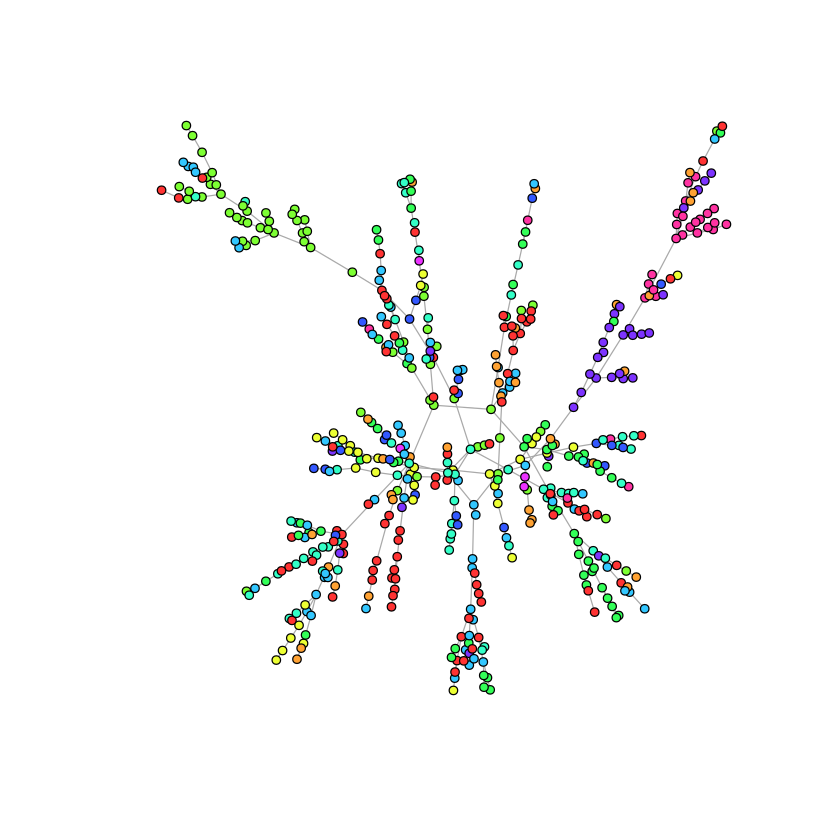

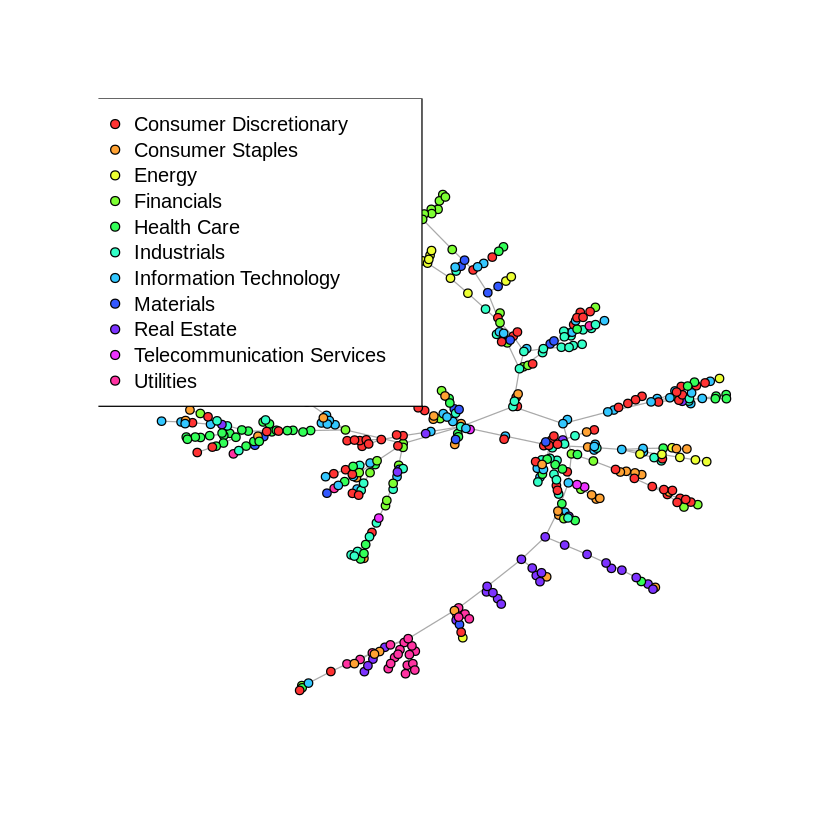

In [ ]:
mst_month_15 <- mst(month_15_g,algorithm="prim")
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors_m.index])

plot(mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors_m.index])
legend('topleft',legend=levels(sector_w.set),pch=21, pt.bg=colbar)

[1] 65

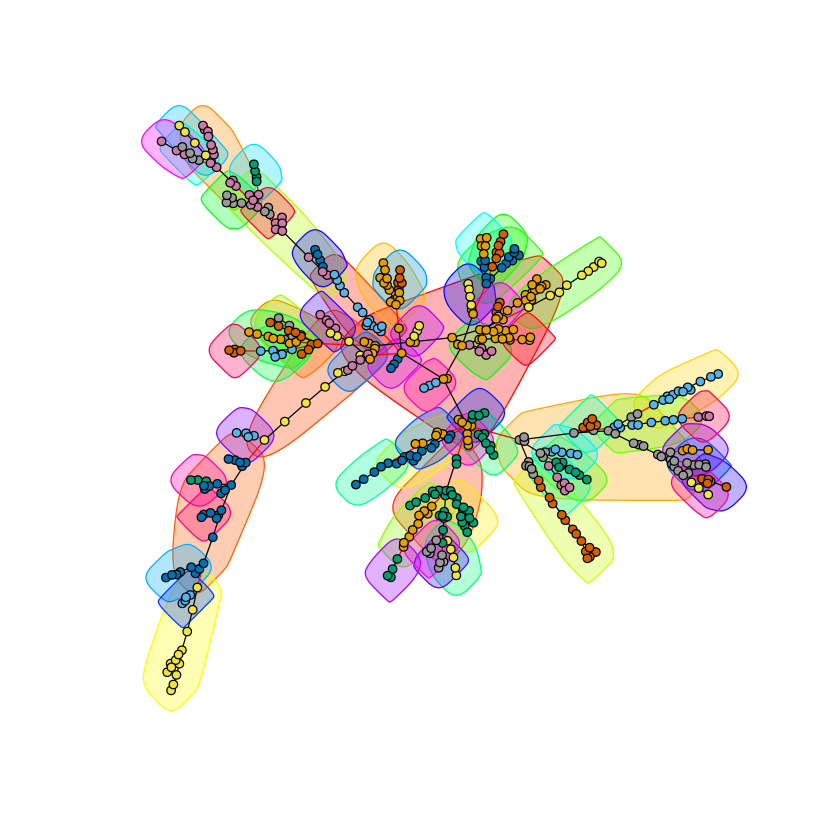

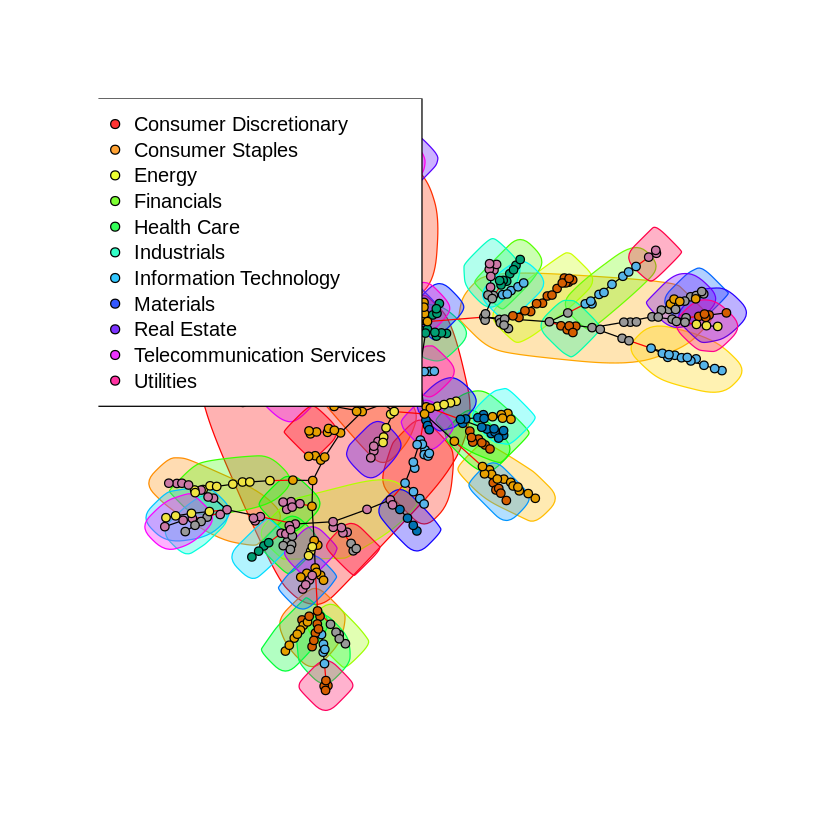

In [ ]:
#cluster
wc_monthly <- walktrap.community(mst_month_15)
length(wc_monthly)
plot(wc_monthly, mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)

plot(wc_monthly, mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

In [ ]:
#get metrics
true<- c(sectors_m.index)
pred <- c(wc_monthly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.4794473

[1] 0.2775512

predict sector or unkown stock

In [ ]:
Si <- c()
for(i in c(1:num_sector)){
  #Si stores the number of members in sector i
  Si <- table(sectors.index)
}
Si

sectors.index
 1  2  3  4  5  6  7  8  9 10 11 
84 36 34 63 60 64 66 24 31  4 28 

In [ ]:
# find alpha for 
p_method_1 = numeric(vcount(mst_g))
p_method_2 = numeric(vcount(mst_g))
for(v in c(1:vcount(mst_g))){

    #N_i is the number of neighbors of v 
    N_i = neighbors(mst_g, v)
    #Q_i is the number of neighbors of v which belong to the same sector as v 
    current_sector = sectors.index[v]
    Q_i = intersect(N_i, which(sectors.index == current_sector))

    p_method_1[v] = length(Q_i) / length(N_i)
    p_method_2[v] = Si[current_sector] / vcount(mst_g)
}
alpha_1 = mean(p_method_1)
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 = mean(p_method_2)
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

[1] "Alpha value for method 1 is: 0.828930077530676"
[1] "Alpha value for method 2 is: 0.114188070612533"


In [ ]:
#repeat for weekly
Si <- c()
for(i in c(1:num_sector)){
  #Si stores the number of members in sector i
  Si <- table(sectors_w.index)
}
Si

# find alpha for 
p_method_1 = numeric(vcount(mst_week_m))
p_method_2 = numeric(vcount(mst_week_m))
for(v in c(1:vcount(mst_week_m))){

    #N_i is the number of neighbors of v 
    N_i = neighbors(mst_week_m, v)
    #Q_i is the number of neighbors of v which belong to the same sector as v 
    current_sector = sectors_w.index[v]
    Q_i = intersect(N_i, which(sectors_w.index == current_sector))

    p_method_1[v] = length(Q_i) / length(N_i)
    p_method_2[v] = Si[current_sector] / vcount(mst_week_m)
}
alpha_1 = mean(p_method_1)
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 = mean(p_method_2)
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

sectors_w.index
 1  2  3  4  5  6  7  8  9 10 11 
84 35 34 62 60 64 66 24 31  4 28 

[1] "Alpha value for method 1 is: 0.743957284810943"
[1] "Alpha value for method 2 is: 0.114308612598321"


In [ ]:
#repeat for monthly
#repeat for weekly
Si <- c()
for(i in c(1:num_sector)){
  #Si stores the number of members in sector i
  Si <- table(sectors_m.index)
}
Si

# find alpha for 
p_method_1 = numeric(vcount(mst_month_15))
p_method_2 = numeric(vcount(mst_month_15))
for(v in c(1:vcount(mst_month_15))){

    #N_i is the number of neighbors of v 
    N_i = neighbors(mst_month_15, v)
    #Q_i is the number of neighbors of v which belong to the same sector as v 
    current_sector = sectors_m.index[v]
    Q_i = intersect(N_i, which(sectors_m.index == current_sector))

    p_method_1[v] = length(Q_i) / length(N_i)
    p_method_2[v] = Si[current_sector] / vcount(mst_month_15)
}
alpha_1 = mean(p_method_1)
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 = mean(p_method_2)
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

sectors_m.index
 1  2  3  4  5  6  7  8  9 10 11 
84 35 34 62 60 64 66 24 31  4 28 

[1] "Alpha value for method 1 is: 0.484446380178087"
[1] "Alpha value for method 2 is: 0.114308612598321"
